In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found exis

In [ ]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
#from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.preprocessing.image import random_rotation, random_shear, random_shift, random_zoom, random_brightness
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import RandomRotation, RandomFlip, RandomBrightness, RandomShear, RandomTranslation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNetV2, VGG16
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tqdm import tqdm as tq


# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Set seed for reproducibility
seed_value = 42

os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"raykazuto","key":"aaab9a6a8d0e8953ae96f79e84d238cb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle (3).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!rm -rf submission/

In [ ]:
!rm -rf Dataset-Final/

In [ ]:
!kaggle datasets download -d shuvoalok/raf-db-dataset
!unzip -q raf-db-dataset.zip -d raf_db_extracted
!ls raf_db_extracted

Dataset URL: https://www.kaggle.com/datasets/shuvoalok/raf-db-dataset
License(s): other
DATASET  test_labels.csv  train_labels.csv


In [ ]:
# Direktori awal untuk train dan test
train_dir = "raf_db_extracted/DATASET/train"
test_dir = "raf_db_extracted/DATASET/test"

# Direktori baru untuk dataset gabungan
combined_dir = "raf_db_extracted/dataset"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

# Daftar kelas RAF-DB (1 hingga 7)
class_folders = [str(i) for i in range(1, 8)]  # ['1', '2', '3', '4', '5', '6', '7']

# Salin file dan folder dari train
for category in class_folders:
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        print(f"Copying training data for class {category}...")
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)
    else:
        print(f"Training directory for class {category} not found!")

# Salin file dan folder dari test
for category in class_folders:
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        print(f"Copying test data for class {category}...")
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)
    else:
        print(f"Test directory for class {category} not found!")

# Verifikasi jumlah gambar per kelas di direktori gabungan
print("\nVerifying combined dataset:")
for category in class_folders:
    combined_category_dir = os.path.join(combined_dir, category)
    if os.path.exists(combined_category_dir):
        num_images = len(os.listdir(combined_category_dir))
        print(f"Class {category}: {num_images} images")
    else:
        print(f"Class {category}: 0 images (directory not found)")

Copying training data for class 1...
Copying training data for class 2...
Copying training data for class 3...
Copying training data for class 4...
Copying training data for class 5...
Copying training data for class 6...
Copying training data for class 7...
Copying test data for class 1...
Copying test data for class 2...
Copying test data for class 3...
Copying test data for class 4...
Copying test data for class 5...
Copying test data for class 6...
Copying test data for class 7...

Verifying combined dataset:
Class 1: 1619 images
Class 2: 355 images
Class 3: 877 images
Class 4: 5957 images
Class 5: 2460 images
Class 6: 867 images
Class 7: 3204 images


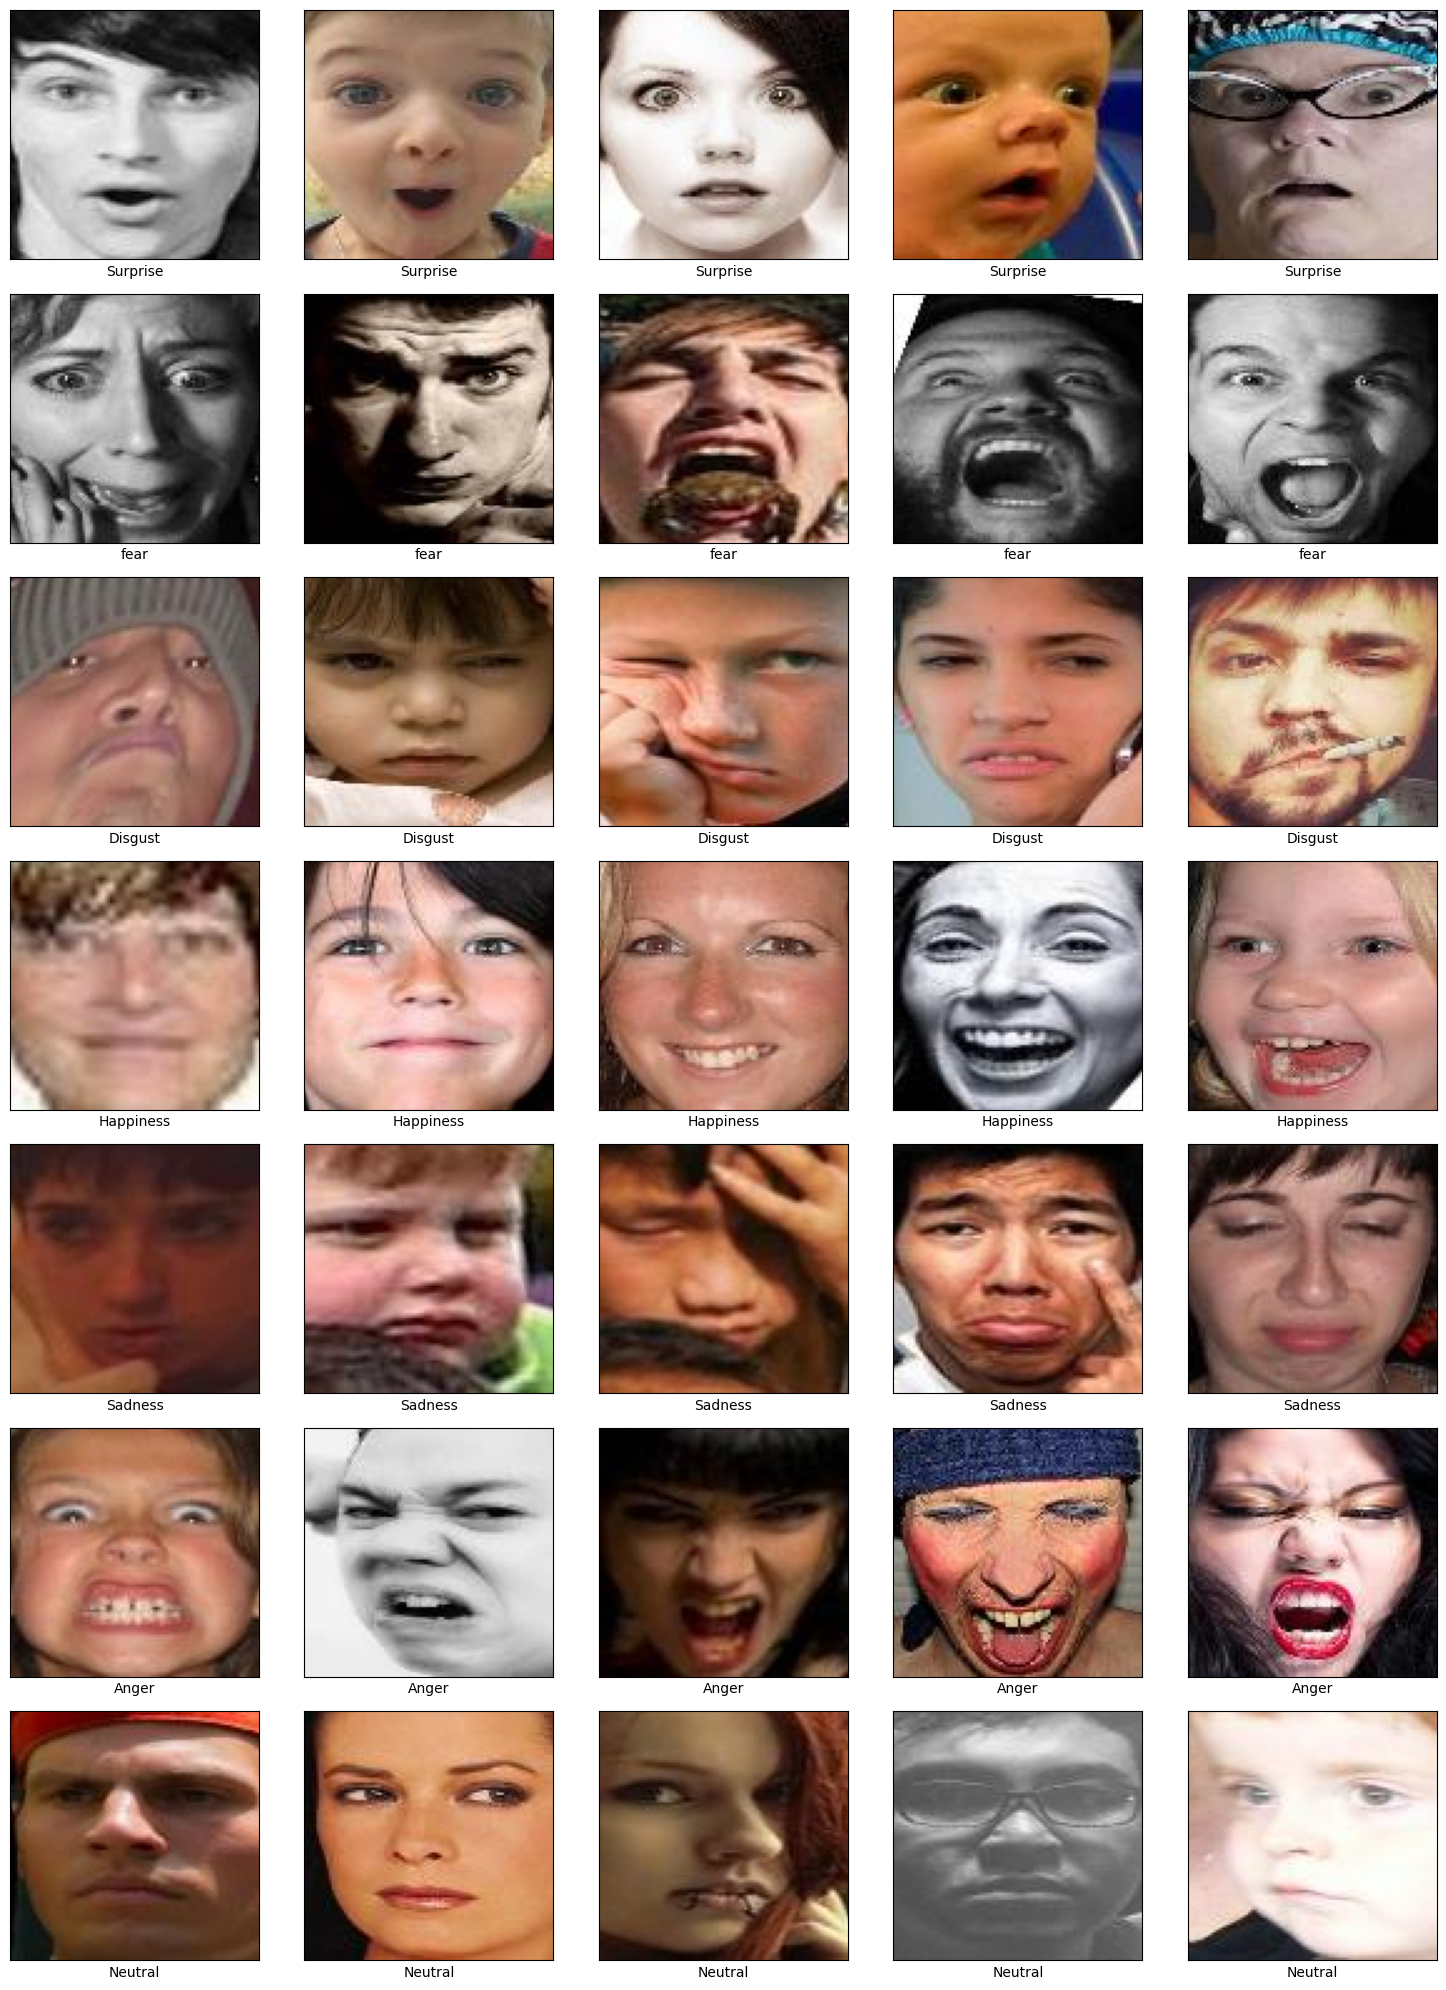

In [ ]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
emotion_images = {}

# Tentukan path sumber dataset gabungan
path = "raf_db_extracted/"
path_sub = os.path.join(path, "dataset")

# Daftar kelas RAF-DB (1 hingga 7) dan nama emosi yang sesuai
class_folders = [str(i) for i in range(1, 8)]  # ['1', '2', '3', '4', '5', '6', '7']
class_names = {
    '1': 'Surprise',
    '2': 'fear',
    '3': 'Disgust',
    '4': 'Happiness',
    '5': 'Sadness',
    '6': 'Anger',
    '7': 'Neutral'
}

# Isi kamus dengan daftar nama file gambar untuk setiap kelas
for class_folder in class_folders:
    class_dir = os.path.join(path_sub, class_folder)
    if os.path.exists(class_dir):
        emotion_images[class_folder] = os.listdir(class_dir)
    else:
        print(f"Directory for class {class_folder} ({class_names[class_folder]}) not found!")
        emotion_images[class_folder] = []

# Menampilkan secara acak 5 gambar dari setiap kelas
fig, axs = plt.subplots(len(class_folders), 5, figsize=(15, 20))  # 7 baris (kelas), 5 kolom

for i, class_folder in enumerate(class_folders):
    # Ambil 5 gambar acak dari kelas ini (jika kurang dari 5, gunakan semua yang ada)
    images = emotion_images[class_folder]
    if len(images) > 0:
        selected_images = np.random.choice(images, min(5, len(images)), replace=False)
    else:
        selected_images = []

    for j in range(5):
        if j < len(selected_images):
            image_name = selected_images[j]
            img_path = os.path.join(path_sub, class_folder, image_name)
            img = Image.open(img_path)  # Buka gambar tanpa konversi ke grayscale
            axs[i, j].imshow(img)  # Tampilkan gambar RGB
            axs[i, j].set(xlabel=class_names[class_folder], xticks=[], yticks=[])
        else:
            axs[i, j].axis('off')  # Matikan axis jika tidak ada gambar

fig.tight_layout()
plt.show()

<ipython-input-9-ec60758991e8>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_data.set_xticklabels(plot_data.get_xticklabels(), rotation=45, ha='right')  # Rotasi label untuk kejelasan


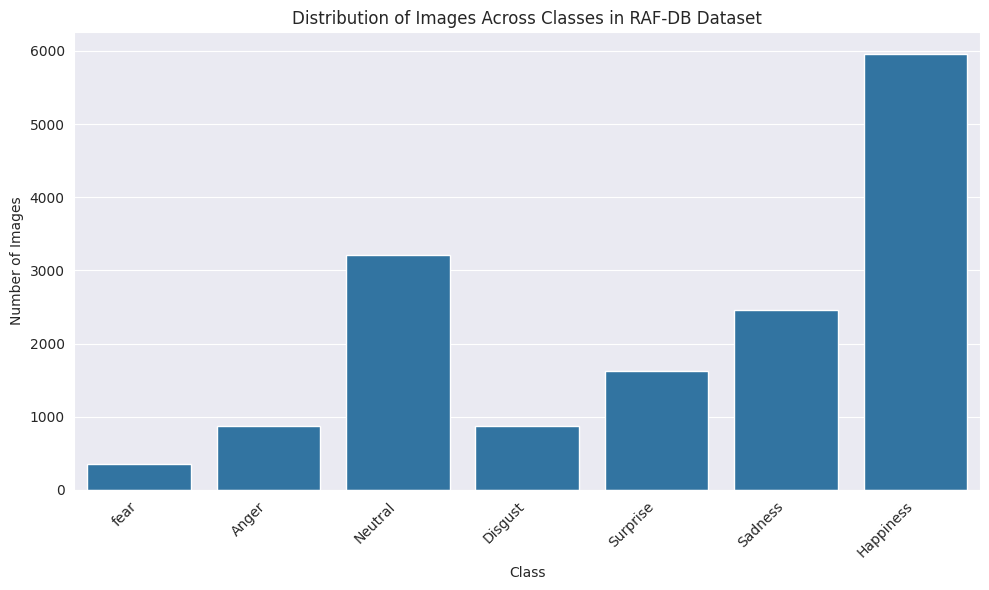


Number of images per class:
labels
Happiness    5957
Neutral      3204
Sadness      2460
Surprise     1619
Disgust       877
Anger         867
fear          355
Name: count, dtype: int64


In [ ]:
# Define source path
emotion_path = "raf_db_extracted/dataset/"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Daftar kelas RAF-DB (1 hingga 7) dan nama emosi yang sesuai
class_names = {
    '1': 'Surprise',
    '2': 'fear',
    '3': 'Disgust',
    '4': 'Happiness',
    '5': 'Sadness',
    '6': 'Anger',
    '7': 'Neutral'
}

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(emotion_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        # Ambil label dari nama subfolder ('1', '2', ..., '7') dan konversi ke nama emosi
        class_folder = path.split('/')[-1]  # Misalnya '1', '2', dll.
        if class_folder in class_names:
            labels.append(class_names[class_folder])  # Konversi ke nama emosi (Fear, Disgust, dll.)
        else:
            labels.append(class_folder)  # Jika tidak dikenali, gunakan nama folder asli
        file_name.append(name)

# Buat DataFrame
distribution_train = pd.DataFrame({"path": full_path, 'file_name': file_name, "labels": labels})

# Plot the distribution of images across the classes
plt.figure(figsize=(10, 6))  # Ukuran lebih besar untuk 7 kelas
sns.set_style("darkgrid")
plot_data = sns.countplot(x=distribution_train['labels'])  # Plot berdasarkan labels
plot_data.set_xticklabels(plot_data.get_xticklabels(), rotation=45, ha='right')  # Rotasi label untuk kejelasan
plt.title("Distribution of Images Across Classes in RAF-DB Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

# Tampilkan jumlah gambar per kelas
print("\nNumber of images per class:")
print(distribution_train['labels'].value_counts())

In [ ]:
# Definisikan fungsi transformasi
def rotate_image(img, angle_range=(-30,30)):
    img = cv2.resize(img, (224, 224))
    angle = random.uniform(*angle_range)
    center = (img.shape[1] // 2,
              img.shape[0] //2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def warp_shift(img, shift_range=0.2):
    img = cv2.resize(img, (224, 224))
    rows, cols, _ = img.shape
    shift_x = random.uniform(-shift_range * cols, shift_range *cols)
    shift_y = random.uniform(-shift_range * cols, shift_range *cols)
    M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    return cv2.warpAffine(img, M, (cols, rows), borderMode=cv2.BORDER_REFLECT)

def blur_image(img):
    img = cv2.resize(img, (224, 224))
    ksize = random.choice([3,5,7])
    return cv2.GaussianBlur(img, (ksize, ksize),0,0)

def add_brightness(img, brightness_range=(0.7, 1.3)):
    img = cv2.resize(img, (224, 224))
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    factor = random.uniform(*brightness_range)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * factor, 0, 255)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def flip_horizontal(img):
    img = cv2.resize(img, (224, 224))
    return cv2.flip(img, 1)

def sheared(img, shear_range=(-0.2, 0.2)):
     img = cv2.resize(img, (224, 224))
     rows, cols, _ = img.shape
     shear_x = random.uniform(*shear_range)
     shear_y = random.uniform(*shear_range)
     M = np.float32([[1, shear_x, 0], [shear_y, 1, 0]])
     return cv2.warpAffine(img, M, (cols, rows), borderMode=cv2.BORDER_REFLECT)

In [ ]:
transformations = {
    'rotate image':rotate_image,
    'warp shift': warp_shift,
    'blurring image': blur_image,
    'add brightness': add_brightness,
    'flip horizpntal': flip_horizontal,
    # 'shear image': sheared
}
base_path = "raf_db_extracted/dataset/"
class_folders = [str(i) for i in range(1, 8)]
# Hitung jumlah gambar asli per kelas
original_counts = {}
for class_folder in class_folders:
    folder_path = os.path.join(base_path, class_folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png')) and not f.startswith('augmented_image_')]
        original_counts[class_folder] = len(files)

# Tentukan target (jumlah gambar di kelas 4)
target_count = original_counts['4']
print(f"Target count (based on class 4): {target_count}")

# Proses augmentasi untuk menyeimbangkan
for class_folder in class_folders:
    images_path = os.path.join(base_path, class_folder)
    augmented_path = os.path.join(base_path, class_folder)
    images = []

    if os.path.exists(images_path):
        for im in os.listdir(images_path):
            img_path = os.path.join(images_path, im)
            try:
                img = io.imread(img_path)
                if img.ndim in [3, 4]:  # RGB atau RGBA
                    images.append(img_path)
                else:
                    print(f"Skipping {img_path}: Invalid dimensions ({img.ndim})")
            except Exception as e:
                print(f"Skipping {img_path}: Error reading image - {e}")
    else:
        print(f"Folder {images_path} not found!")
        continue

    # Hitung jumlah gambar total (asli + augmentasi sebelumnya)
    current_count = len([f for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
    images_to_generate = target_count - current_count if current_count < target_count else 0
    print(f"Class {class_folder}: Current count = {current_count}, Target = {target_count}, Need to generate = {images_to_generate}")

    i = 1
    while i <= images_to_generate:
        if not images:
            print(f"No valid images in {images_path}, skipping augmentation for this class.")
            break
        image = random.choice(images)
        try:
            original_image = io.imread(image)
            if original_image.ndim not in [3, 4]:
                raise ValueError('Invalid image dimensions')

            transformed_image = original_image.copy()
            n = 0
            transformation_count = random.randint(1, len(transformations))

            while n < transformation_count:
                key = random.choice(list(transformations))
                transformed_image = transformations[key](transformed_image)
                n += 1

            new_image_path = os.path.join(augmented_path, f"augmented_image_{current_count + i}.jpg")
            os.makedirs(augmented_path, exist_ok=True)
            transformed_image = img_as_ubyte(transformed_image)
            success = cv2.imwrite(new_image_path, cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))
            if success:
                print(f"Saved augmented image to {new_image_path}")
            else:
                print(f"Failed to save augmented image to {new_image_path}")
            i += 1
        except ValueError as e:
            print(f"Could not process {image}: {e}, hence skipping it.")
        except Exception as e:
            print(f"Error processing {image}: {e}, hence skipping it.")

print("Augmentation completed for all classes!")

Streaming output truncated to the last 5000 lines.
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3713.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3714.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3715.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3716.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3717.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3718.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3719.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3720.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3721.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3722.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3723.jpg
Saved augmented image to raf_db_extracted/dataset/6/augmented_image_3724.jpg
Saved augmented image to 

<ipython-input-12-ec60758991e8>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_data.set_xticklabels(plot_data.get_xticklabels(), rotation=45, ha='right')  # Rotasi label untuk kejelasan


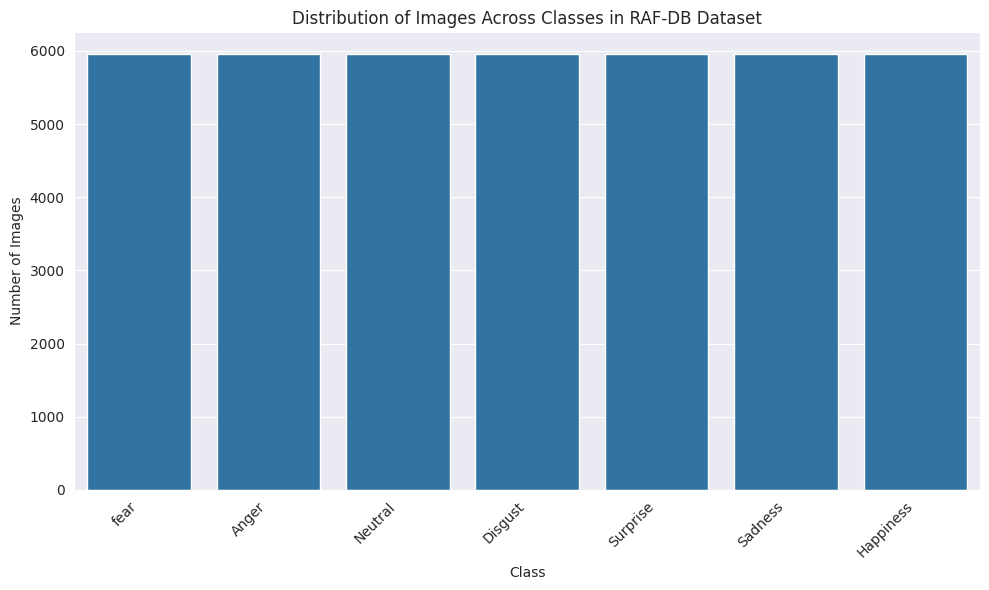


Number of images per class:
labels
fear         5957
Anger        5957
Neutral      5957
Disgust      5957
Surprise     5957
Sadness      5957
Happiness    5957
Name: count, dtype: int64


In [ ]:
# Define source path
emotion_path = "raf_db_extracted/dataset/"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Daftar kelas RAF-DB (1 hingga 7) dan nama emosi yang sesuai
class_names = {
    '1': 'Surprise',
    '2': 'fear',
    '3': 'Disgust',
    '4': 'Happiness',
    '5': 'Sadness',
    '6': 'Anger',
    '7': 'Neutral'
}

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(emotion_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        # Ambil label dari nama subfolder ('1', '2', ..., '7') dan konversi ke nama emosi
        class_folder = path.split('/')[-1]  # Misalnya '1', '2', dll.
        if class_folder in class_names:
            labels.append(class_names[class_folder])  # Konversi ke nama emosi (Fear, Disgust, dll.)
        else:
            labels.append(class_folder)  # Jika tidak dikenali, gunakan nama folder asli
        file_name.append(name)

# Buat DataFrame
distribution_train = pd.DataFrame({"path": full_path, 'file_name': file_name, "labels": labels})

# Plot the distribution of images across the classes
plt.figure(figsize=(10, 6))  # Ukuran lebih besar untuk 7 kelas
sns.set_style("darkgrid")
plot_data = sns.countplot(x=distribution_train['labels'])  # Plot berdasarkan labels
plot_data.set_xticklabels(plot_data.get_xticklabels(), rotation=45, ha='right')  # Rotasi label untuk kejelasan
plt.title("Distribution of Images Across Classes in RAF-DB Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

# Tampilkan jumlah gambar per kelas
print("\nNumber of images per class:")
print(distribution_train['labels'].value_counts())

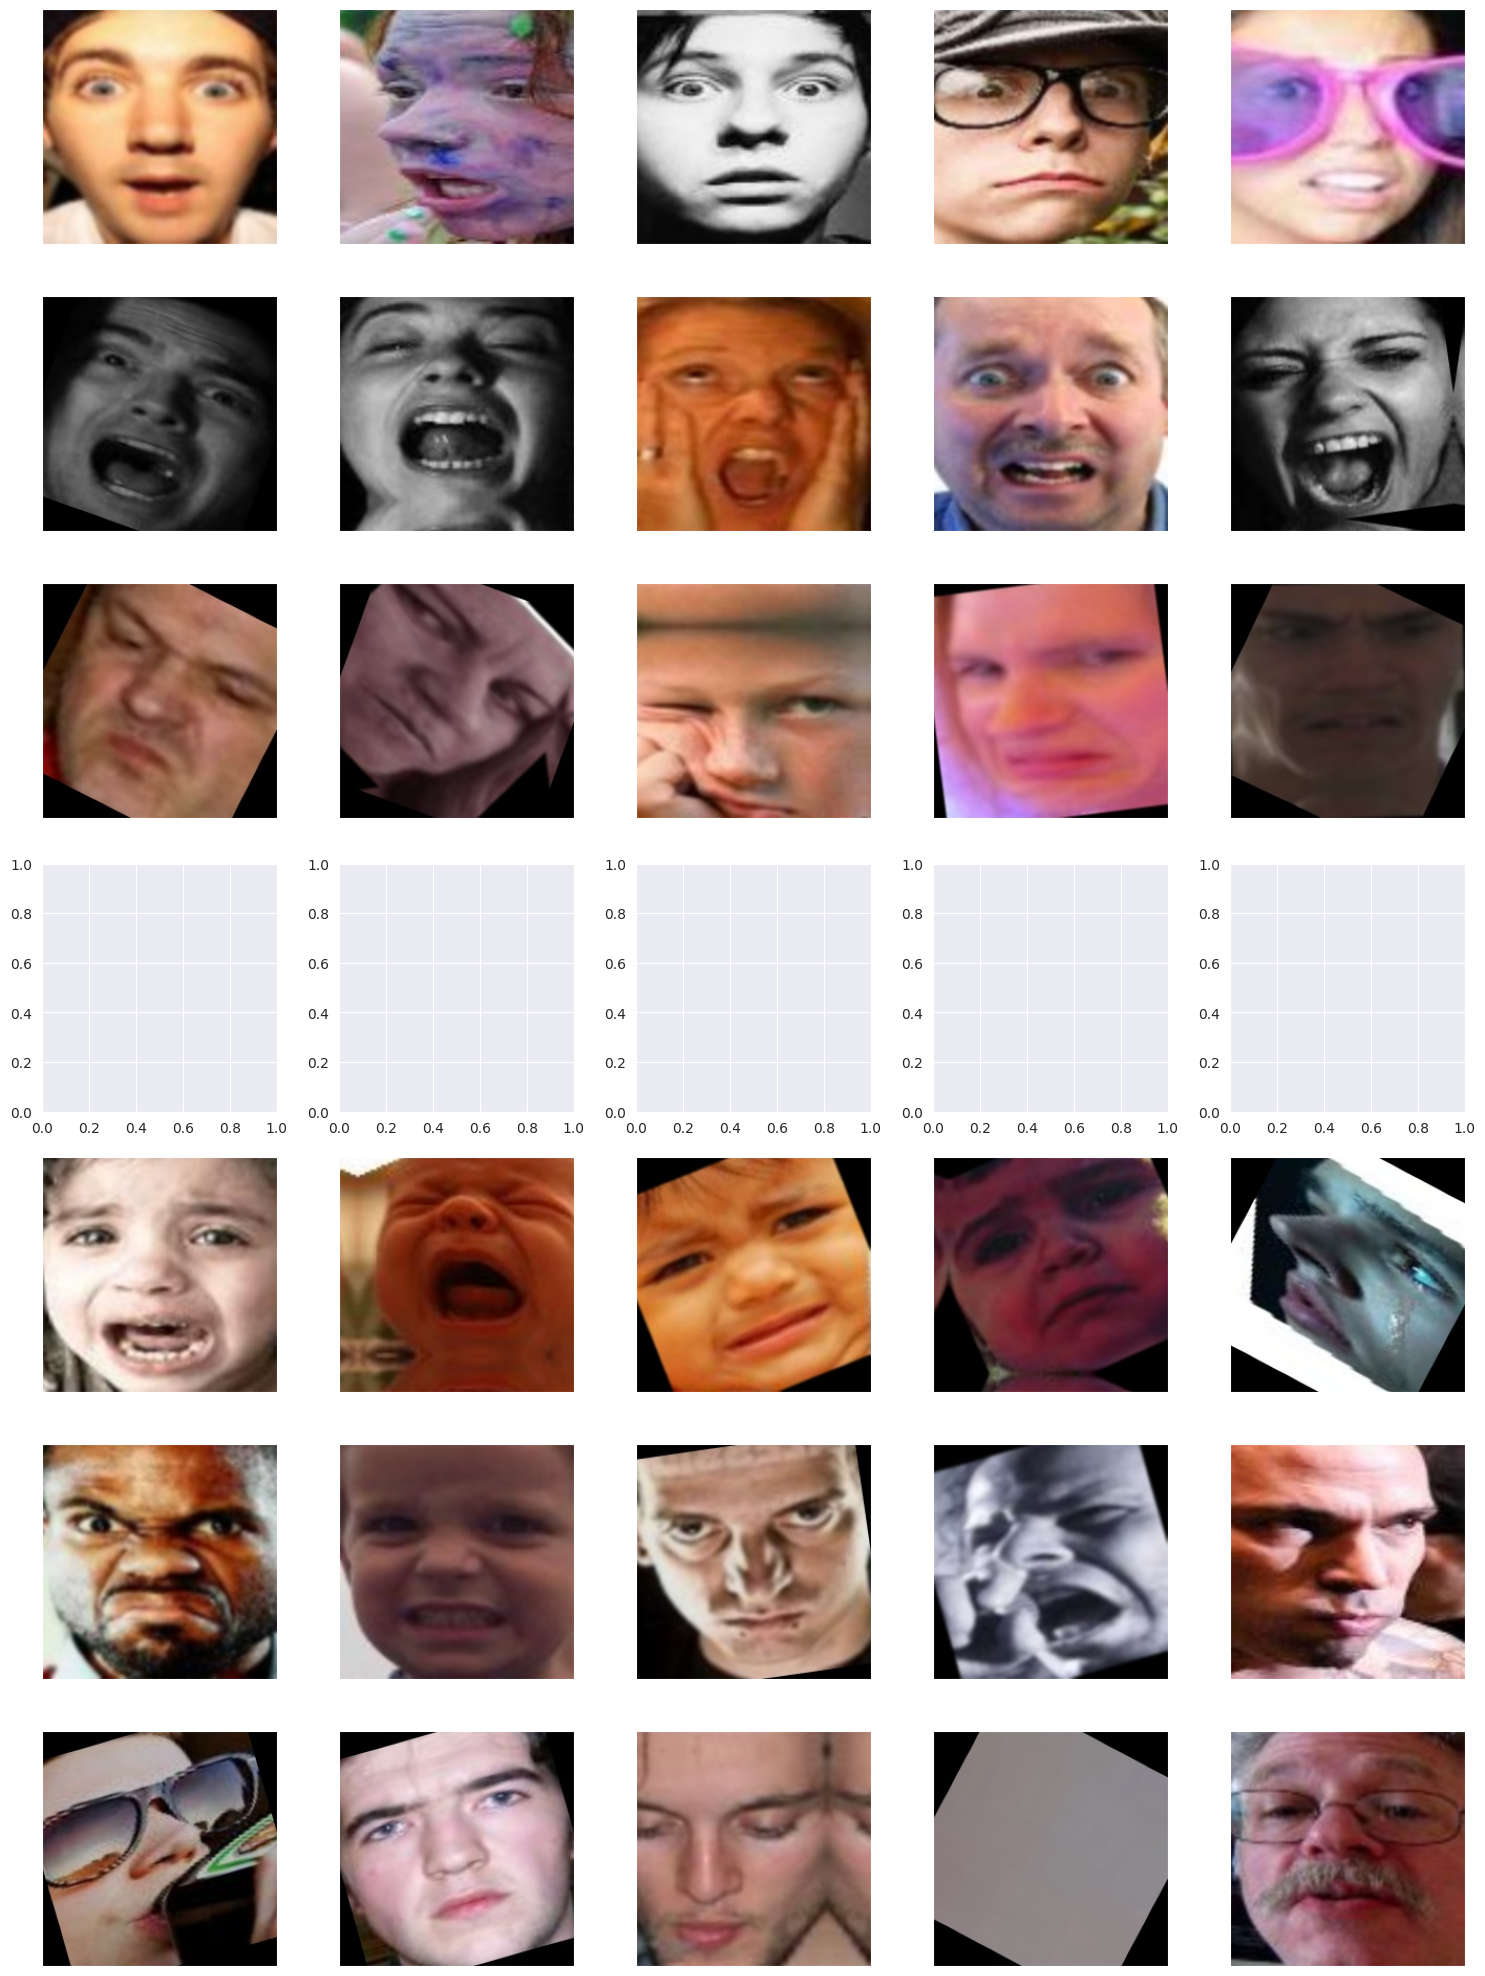

In [ ]:
# cek gambar setelah proses augmentasi

import matplotlib.pyplot as plt
import os
from skimage import io
import random

# Define the path to the augmented images
augmented_path = "raf_db_extracted/dataset/"

# Function to display a random sample of augmented images
def display_augmented_images(path, num_images_per_class=5):
    class_folders = [str(i) for i in range(1, 8)]
    fig, axs = plt.subplots(len(class_folders), num_images_per_class, figsize=(15, 20))
    for i, class_folder in enumerate(class_folders):
        images_path = os.path.join(path, class_folder)
        augmented_images = [f for f in os.listdir(images_path) if f.startswith("augmented_image_")]
        selected_images = random.sample(augmented_images, min(num_images_per_class, len(augmented_images)))
        for j, image_name in enumerate(selected_images):
          img_path = os.path.join(images_path, image_name)
          try:
              img = io.imread(img_path)
              axs[i, j].imshow(img)
              axs[i, j].set(xticks=[], yticks=[])
          except Exception as e:
              print(f"Error displaying image {img_path}: {e}")
              axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Display augmented images
display_augmented_images(augmented_path)


In [ ]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath = 'raf_db_extracted/dataset/'

file_name = []
labels = []
full_path = []

# Mengumpulkan data gambar dengan looping
for path, subdirs, files in os.walk(mypath):
    for name in files:
        if name.lower().endswith(('.jpg', '.jpeg', '.png')):  # Hanya file gambar
            full_path.append(os.path.join(path, name))
            # Ambil label dari subfolder terakhir (1, 2, ..., 7)
            label = path.split('/')[-1]
            labels.append(class_names.get(label, label))  # Konversi ke nama emosi jika ada
            file_name.append(name)

# Memasukkan variabel ke dalam DataFrame
df = pd.DataFrame({"path": full_path, 'file_name': file_name, "labels": labels})

# Melihat jumlah data gambar pada masing-masing label
print("Jumlah data gambar per label:")
print(df.groupby(['labels']).size())

Jumlah data gambar per label:
labels
Anger        5957
Disgust      5957
Happiness    5957
Neutral      5957
Sadness      5957
Surprise     5957
fear         5957
dtype: int64


In [ ]:
# Pastikan DataFrame df sudah ada (dari langkah sebelumnya)
# Variabel yang digunakan pada pemisahan data: X = data path, y = data labels
X = df['path']
y = df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300, stratify=y
)

In [ ]:
# Menyatukan kedalam masing-masing DataFrame
df_tr = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_te = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

In [ ]:
# Print hasil diatas untuk melihat panjang size data training dan testing
print('train size', len(df_tr))
print('test size', len(df_te))

train size 33359
test size 8340


In [ ]:
# Gabungkan DataFrame df_tr dan df_te
df_all = pd.concat([df_tr, df_te], ignore_index=True)

# Tampilkan distribusi data berdasarkan set dan labels
print('===================================================== \n')
print("Distribusi data berdasarkan set dan labels:")
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sampel data
print("Sampel data (7 baris acak):")
print(df_all.sample(7))


Distribusi data berdasarkan set dan labels:
set    labels   
test   Anger        1191
       Disgust      1192
       Happiness    1192
       Neutral      1191
       Sadness      1191
       Surprise     1191
       fear         1192
train  Anger        4766
       Disgust      4765
       Happiness    4765
       Neutral      4766
       Sadness      4766
       Surprise     4766
       fear         4765
dtype: int64 


Sampel data (7 baris acak):
                                                    path    labels    set
38097  raf_db_extracted/dataset/5/augmented_image_303...   Sadness   test
6650   raf_db_extracted/dataset/1/augmented_image_324...  Surprise  train
26179  raf_db_extracted/dataset/2/augmented_image_535...      fear  train
7217   raf_db_extracted/dataset/1/augmented_image_430...  Surprise  train
29453  raf_db_extracted/dataset/3/train_09739_aligned...   Disgust  train
33933  raf_db_extracted/dataset/1/train_06968_aligned...  Surprise   test
1359   raf_db_extracted/da

In [ ]:
# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "raf_db_extracted/dataset/"
# Membuat variabel Dataset, dimana nanti menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset-Final/"

In [ ]:
# Inisialisasi counter untuk melacak file yang disalin
copy_counts = {'train': {}, 'test': {}}

for index, row in tq(df_all.iterrows(), total=len(df_all), desc="Organizing dataset"): #using the imported name 'tq'
    # Deteksi filepath
    file_path = row['path']
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}, skipping.")
        continue

    # Buat direktori tujuan berdasarkan set dan labels
    target_dir = os.path.join(dataset_path, row['set'], row['labels'])
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(target_dir, destination_file_name)

    # Salin file dari sumber ke tujuan
    if not os.path.exists(file_dest):
        shutil.copy2(file_path, file_dest)

        # Update counter
        set_type = row['set']
        label = row['labels']
        if label not in copy_counts[set_type]:
            copy_counts[set_type][label] = 0
        copy_counts[set_type][label] += 1

# Verifikasi jumlah file yang disalin
print("\nJumlah file yang disalin:")
for set_type in copy_counts:
    print(f"\nSet: {set_type}")
    for label, count in copy_counts[set_type].items():
        print(f"  {label}: {count} files")

Organizing dataset: 100%|██████████| 41699/41699 [00:11<00:00, 3718.24it/s]


Jumlah file yang disalin:

Set: train
  fear: 4765 files
  Happiness: 4765 files
  Neutral: 4766 files
  Sadness: 4766 files
  Disgust: 4765 files
  Anger: 4766 files
  Surprise: 4766 files

Set: test
  Happiness: 1192 files
  fear: 1192 files
  Surprise: 1191 files
  Anger: 1191 files
  Disgust: 1192 files
  Neutral: 1191 files
  Sadness: 1191 files


In [ ]:
# Define training and test directories
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"

# Daftar kelas RAF-DB
class_labels = ['Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral', 'Surprise']

# Fungsi untuk menghitung jumlah gambar di direktori
def count_images(directory):
    return len([f for f in os.listdir(directory) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Hitung dan cetak jumlah gambar untuk setiap kelas di train dan test
print("Total number of images in training set by class:")
for label in class_labels:
    train_dir = os.path.join(TRAIN_DIR, label)
    if os.path.exists(train_dir):
        print(f"  {label}: {count_images(train_dir)} images")
    else:
        print(f"  {label}: Directory not found (0 images)")

print("\nTotal number of images in test set by class:")
for label in class_labels:
    test_dir = os.path.join(TEST_DIR, label)
    if os.path.exists(test_dir):
        print(f"  {label}: {count_images(test_dir)} images")
    else:
        print(f"  {label}: Directory not found (0 images)")

# Hitung total keseluruhan (opsional)
total_train = sum(count_images(os.path.join(TRAIN_DIR, label)) for label in class_labels if os.path.exists(os.path.join(TRAIN_DIR, label)))
total_test = sum(count_images(os.path.join(TEST_DIR, label)) for label in class_labels if os.path.exists(os.path.join(TEST_DIR, label)))
print(f"\nTotal number of images in training set: {total_train}")
print(f"Total number of images in test set: {total_test}")

Total number of images in training set by class:
  Fear: Directory not found (0 images)
  Disgust: 4765 images
  Happiness: 4765 images
  Sadness: 4766 images
  Anger: 4766 images
  Neutral: 4766 images
  Surprise: 4766 images

Total number of images in test set by class:
  Fear: Directory not found (0 images)
  Disgust: 1192 images
  Happiness: 1192 images
  Sadness: 1191 images
  Anger: 1191 images
  Neutral: 1191 images
  Surprise: 1191 images

Total number of images in training set: 28594
Total number of images in test set: 7148


In [ ]:
# Create an ImageDataGenerator object normalizing the images
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255.)
# Train generator
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=32,
    target_size=(224,224),
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False
)

Found 26688 images belonging to 7 classes.
Found 6671 images belonging to 7 classes.
Found 8340 images belonging to 7 classes.


In [ ]:
# Load the pre-trained MobileNet model (excluding the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#freeze semua layer pada base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
kernel_regularizer = l2(0.01)
output_layer = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary (optional)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 9,775,271 (37.29 MB)

 Trainable params: 7,514,471 (28.67 MB)

 Non-trainable params: 2,260,800 (8.62 MB)

In [ ]:
# Earlystop dan ReduceLR
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    batch_size=32,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
834/834 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.3146 - loss: 1.8925 - val_accuracy: 0.4361 - val_loss: 1.4359 - learning_rate: 1.0000e-04
Epoch 2/20
834/834 ━━━━━━━━━━━━━━━━━━━━ 56s 67ms/step - accuracy: 0.5107 - loss: 1.3650 - val_accuracy: 0.5218 - val_loss: 1.2350 - learning_rate: 1.0000e-04
Epoch 3/20
834/834 ━━━━━━━━━━━━━━━━━━━━ 55s 66ms/step - accuracy: 0.5761 - loss: 1.1860 - val_accuracy: 0.5588 - val_loss: 1.1648 - learning_rate: 1.0000e-04
Epoch 4/20
834/834 ━━━━━━━━━━━━━━━━━━━━ 55s 66ms/step - accuracy: 0.6410 - loss: 1.0311 - val_accuracy: 0.5575 - val_loss: 1.1905 - learning_rate: 1.0000e-04
Epoch 5/20
834/834 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - accuracy: 0.7047 - loss: 0.8569 - val_accuracy: 0.5900 - val_loss: 1.1466 - learning_rate: 1.0000e-04
Epoch 6/20
834/834 ━━━━━━━━━━━━━━━━━━━━ 54s 65ms/step - accuracy: 0.7734 - loss: 0.6925 - val_accuracy: 0.6112 - val_loss: 1.1490 - learning_rate: 1.0000e-04
Epoch 7/20
834/834 ━━━━━━━━━━━━━━━━━━━━ 55s 66ms/ste

In [ ]:
# Unfreeze some layers of the base model
for layer in base_model.layers[-200:]:
  layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# EarlyStop dan ReduceRL
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Fine-tune the model
history_fine_tuned = model.fit(
    train_generator,
    epochs=50,
    batch_size=32,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 173s 146ms/step - accuracy: 0.5146 - loss: 1.4269 - val_accuracy: 0.4852 - val_loss: 1.4260 - learning_rate: 1.0000e-04
Epoch 2/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 116s 139ms/step - accuracy: 0.7228 - loss: 0.8199 - val_accuracy: 0.5969 - val_loss: 1.1104 - learning_rate: 1.0000e-04
Epoch 3/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 115s 138ms/step - accuracy: 0.8100 - loss: 0.5777 - val_accuracy: 0.7011 - val_loss: 0.8416 - learning_rate: 1.0000e-04
Epoch 4/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 115s 138ms/step - accuracy: 0.8636 - loss: 0.4283 - val_accuracy: 0.7736 - val_loss: 0.6630 - learning_rate: 1.0000e-04
Epoch 5/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 115s 137ms/step - accuracy: 0.8968 - loss: 0.3312 - val_accuracy: 0.7690 - val_loss: 0.6982 - learning_rate: 1.0000e-04
Epoch 6/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 115s 138ms/step - accuracy: 0.9246 - loss: 0.2487 - val_accuracy: 0.7769 - val_loss: 0.7036 - learning_rate: 1.0000e-04
Epoch 7/50
834/834 ━━━━━━━━━━━━━━━━━━━━ 

In [36]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(test_generator)
val_loss, val_acc = model.evaluate(validation_generator)

print(f"Training Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")
print(f"Validation Accuracy: {val_acc}")

834/834 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - accuracy: 0.9829 - loss: 0.0527
261/261 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8797 - loss: 0.4454
209/209 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.8853 - loss: 0.3999
Training Accuracy: 0.9825764298439026
Test Accuracy: 0.8523980975151062
Validation Accuracy: 0.8553439974784851


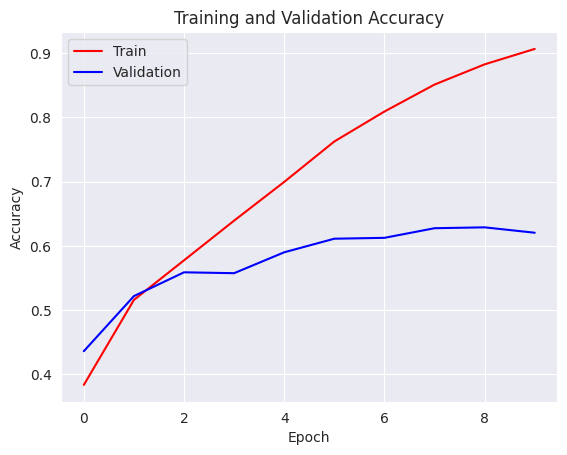

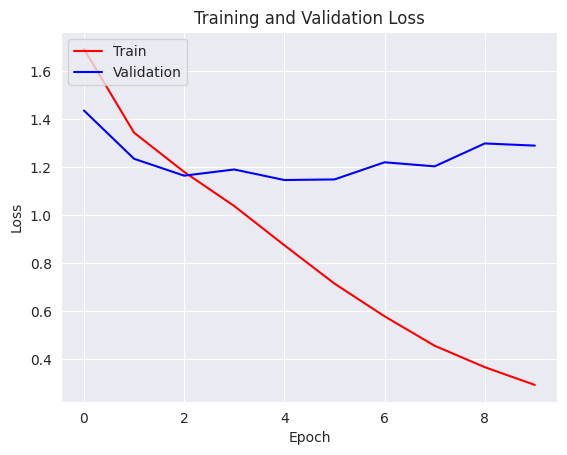

In [37]:
# Ekstraksi metrik dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Rentang epoch
epochs = range(len(acc))

# Plot akurasi
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
os.makedirs("submission/tf-js-model", exist_ok=True)
os.makedirs("submission/tflite", exist_ok=True)
os.makedirs("submission/saved_model/variables", exist_ok=True)

files = [
    "submission/tf-js-model/model.json",
    "submission/tf-js-model/group1-shard1of1.bin",
    "submission/tflite/model.tflite",
    "submission/tflite/label.txt",
    "submission/saved_model/saved_model.pb",
    "submission/notebook.ipynb",
    "submission/README.md",
    "submission/requirements.txt"
]

for file in files:
    open(file, 'w').close()

In [38]:
tf.saved_model.save(model, 'submission/saved_model')

In [39]:
!tensorflowjs_converter \
        --input_format=tf_saved_model \
        --saved_model_tags=serve \
        submission/saved_model \
        submission/tfjs_model

2025-03-21 19:46:40.684637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742586400.705603   27548 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742586400.713676   27548 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742586400.729801   27548 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742586400.729826   27548 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742586400.729830   27548 computation_placer.cc:177] computation placer alr

In [40]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('submission/tflite/model.tflite','wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp3hrkz6lc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_175')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  134595306767952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595306767760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595306766800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595306768144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595306769104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595306767184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595402350224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595402347152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595306769680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134595402348496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1345954023

In [41]:
# Replace with the actual labels from your RAF-DB dataset
class_labels = ['Surprise', 'fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']

with open("submission/tflite/label.txt", "w") as f:
    f.write("\n".join(class_labels))

In [42]:
!pip freeze > submission/requirements.txt

In [43]:
!zip -r submission.zip submission/

  adding: submission/ (stored 0%)
  adding: submission/requirements.txt (deflated 57%)
  adding: submission/notebook.ipynb (stored 0%)
  adding: submission/tf-js-model/ (stored 0%)
  adding: submission/tf-js-model/group1-shard1of1.bin (stored 0%)
  adding: submission/tf-js-model/model.json (stored 0%)
  adding: submission/README.md (stored 0%)
  adding: submission/tfjs_model/ (stored 0%)
  adding: submission/tfjs_model/group1-shard1of10.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard7of10.bin (deflated 8%)
  adding: submission/tfjs_model/group1-shard2of10.bin (deflated 7%)
  adding: submission/tfjs_model/group1-shard9of10.bin (deflated 8%)
  adding: submission/tfjs_model/group1-shard5of10.bin (deflated 8%)
  adding: submission/tfjs_model/group1-shard3of10.bin (deflated 8%)
  adding: submission/tfjs_model/group1-shard4of10.bin (deflated 8%)
  adding: submission/tfjs_model/group1-shard8of10.bin (deflated 8%)
  adding: submission/tfjs_model/model.json (deflated 96%)
  addin

In [44]:
from google.colab import files
files.download('submission.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cat notebook.ipynb

cat: notebook.ipynb: No such file or directory


In [45]:
!unzip -l submission.zip

Archive:  submission.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2025-03-21 19:46   submission/
    12343  2025-03-21 19:47   submission/requirements.txt
        0  2025-03-21 19:44   submission/notebook.ipynb
        0  2025-03-21 19:44   submission/tf-js-model/
        0  2025-03-21 19:44   submission/tf-js-model/group1-shard1of1.bin
        0  2025-03-21 19:44   submission/tf-js-model/model.json
        0  2025-03-21 19:44   submission/README.md
        0  2025-03-21 19:46   submission/tfjs_model/
  4194304  2025-03-21 19:46   submission/tfjs_model/group1-shard1of10.bin
  4194304  2025-03-21 19:46   submission/tfjs_model/group1-shard7of10.bin
  4194304  2025-03-21 19:46   submission/tfjs_model/group1-shard2of10.bin
  4194304  2025-03-21 19:46   submission/tfjs_model/group1-shard9of10.bin
  4194304  2025-03-21 19:46   submission/tfjs_model/group1-shard5of10.bin
  4194304  2025-03-21 19:46   submission/tfjs_model/group1-shard3of10.bin
  4194304

In [ ]:
from google.colab import files
files.download(submission.zip)